# Programming Exercise 6: Support Vector Machines
## 1 Support Vector Machines

### 1.1 Example Dataset 1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.svm import SVC # C-Support Vector Classification
from mlxtend.plotting import plot_decision_regions
import re
from ex6_python.porterStemmer import porterStemmer

%matplotlib inline

In [6]:
data = loadmat('ex6/ex6data1.mat')
X = data.get('X')
y = data.get('y')

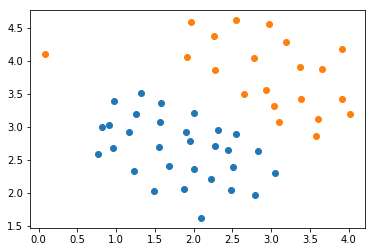

In [33]:
for i in [0, 1]:
    plt.plot(X[(y==i).flatten(), 0], X[(y==i).flatten(), 1], 'o');

#### Trying out SKLearn's linear kernel SVC

In [115]:
C = 1.

In [116]:
model = SVC(C=C, kernel='linear')
model.fit(X, y.flatten())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

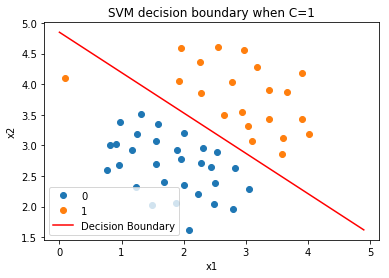

In [117]:
# Calculate decision boundary by rearranging a_1 x_1 + a_2 x_2 + c = 0, using coefficients (a) and y-intercept term (c).

for i in [0, 1]:
    plt.plot(X[(y==i).flatten(), 0], X[(y==i).flatten(), 1], 'o', label=str(i));

# Then plot the boundary layer
plt.plot(np.arange(0, 5, 0.1), (-(model.coef_[0][0] * np.arange(0, 5, 0.1))/model.coef_[0][1] - (model.intercept_ / model.coef_[0][1])), 'r', label='Decision Boundary');
plt.legend(); plt.ylabel('x2'); plt.xlabel('x1');
plt.title('SVM decision boundary when C=1');



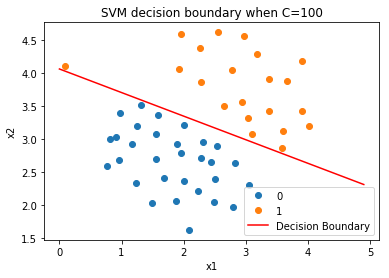

In [114]:
# Calculate decision boundary by rearranging a_1 x_1 + a_2 x_2 + c = 0, using coefficients (a) and y-intercept term (c).

for i in [0, 1]:
    plt.plot(X[(y==i).flatten(), 0], X[(y==i).flatten(), 1], 'o', label=str(i));

# Then plot the boundary layer
plt.plot(np.arange(0, 5, 0.1), (-(model.coef_[0][0] * np.arange(0, 5, 0.1))/model.coef_[0][1] - (model.intercept_ / model.coef_[0][1])), 'r', label='Decision Boundary');
plt.legend(); plt.ylabel('x2'); plt.xlabel('x1');
plt.title('SVM decision boundary when C=100');



### 1.2 SVM with Gaussian Kernels

#### 1.2.1 Gaussian Kernel

In [147]:
type(X[:, 1])

numpy.ndarray

In [180]:
def gaussianKernel(x1, x2, sigma):
    """
    RBFKERNEL returns a radial basis function kernel between x1 and x2
       sim = gaussianKernel(x1, x2) returns a gaussian kernel between x1 and x2
       and returns the value in sim
    """
    
    if (type(x1) is not np.ndarray) | (type(x2) is not np.ndarray):
        raise ValueError('x1 and x2 must be 1-d numpy array')

    sim = np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * sigma**2)) # similarity.
    
    return sim

In [181]:
gaussianKernel(X[:, 0], X[:, 1], 1)

2.346426874485222e-21

In [182]:
x1 = np.array([1, 2, 1]); x2 = np.array([0, 4, -1]); sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

In [183]:
print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = {} :\n\t{}\n(for sigma = 2, this value should be about 0.324652)\n'.format(sigma, sim))

Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2 :
	0.32465246735834974
(for sigma = 2, this value should be about 0.324652)



#### 1.2.2 Example Dataset 2

In [268]:
data = loadmat('ex6/ex6data2.mat')
X = data.get('X')
y = data.get('y').flatten()

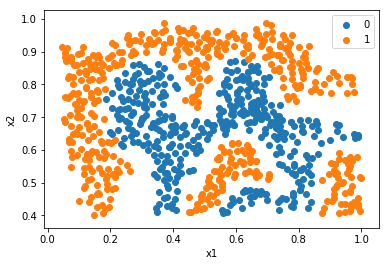

In [201]:
for i in np.unique(y):
    plt.scatter(X[(y==i), 0], X[(y==i), 1], label=i)

plt.legend(); plt.ylabel('x2'); plt.xlabel('x1');

In [272]:
C=1.0
sigma = 10

In [273]:
# Note: gamma operates equivalently as the inverse of sigma. So 
# high gamma will mean low radius -> overfit
# low gamma will mean high radius -> underfit.
model = SVC(C=C, kernel='rbf', gamma=sigma)
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

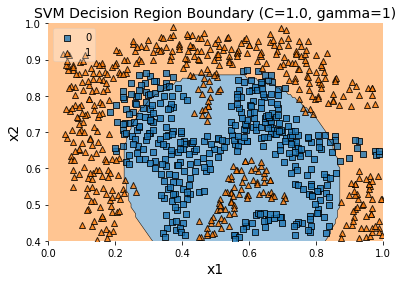

In [271]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.title('SVM Decision Region Boundary (C={}, gamma={})'.format(C, sigma), size=14);
plt.xlim((0,1)); plt.ylim((0.4,1));

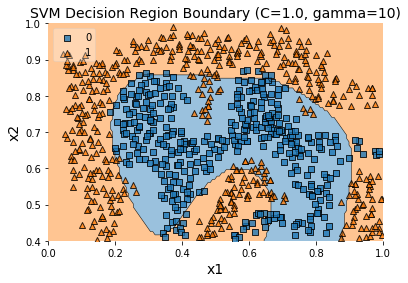

In [274]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('x1', size=14)
plt.ylabel('x2', size=14)
plt.title('SVM Decision Region Boundary (C={}, gamma={})'.format(C, sigma), size=14);
plt.xlim((0,1)); plt.ylim((0.4,1));

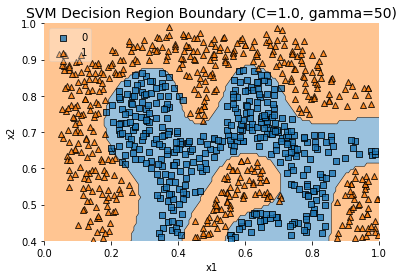

In [258]:
plot_decision_regions(X=X, 
                      y=y,
                      clf=model, 
                      legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Region Boundary (C={}, gamma={})'.format(C, sigma), size=14);
plt.xlim((0,1)); plt.ylim((0.4,1));

#### 1.2.3 Example Dataset 3

In [286]:
data = loadmat('ex6/ex6data3.mat')
X = data.get('X')
y = data.get('y').flatten()

Xval = data.get('Xval')
yval = data.get('yval').flatten()

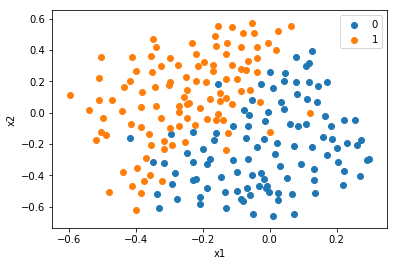

In [287]:
for i in np.unique(y):
    plt.scatter(X[(y==i), 0], X[(y==i), 1], label=i)
    
plt.legend(); plt.ylabel('x2'); plt.xlabel('x1');

In [290]:
# Your task is to use the cross validation set Xval, yval to determine the
# best C and sigma parameter to use. You should write any additional code nec-
# essary to help you search over the parameters C and sigma. For both C and sigma, we
# suggest trying values in multiplicative steps (e.g., 0:01; 0:03; 0:1; 0:3; 1; 3; 10; 30).
# Note that you should try all possible pairs of values for C and sigma (e.g., C = 0:3
# and sigma = 0:1). For example, if you try each of the 8 values listed above for C
# and for sigma^2, you would end up training and evaluating (on the cross validation
# set) a total of 82 = 64 different models.

In [338]:
# How? Loop through values of sigma and C for training set. Return F1 using recall and precision 

def recall(actual, predicted):
    """True positives / (True positives + False negatives)"""
    tp = sum(actual[actual == 1] == predicted[actual ==1])
    fn = sum(actual[actual == 1] != predicted[actual ==1])
    
    r = tp / (tp + fn)
    
    return r


def precision(actual, predicted):
    """True positives / (True positives + False positives)"""
    tp = sum(actual[actual == 1] == predicted[actual == 1])
    fp = sum(actual[actual == 0] != predicted[actual == 0])
    
    p = tp / (tp + fp)    
    
    return p



def F1(actual, predicted):
    
    p = precision(actual, predicted)
    r = recall(actual, predicted)
    
    return 2*p*r/(p+r)

In [340]:
from sklearn.metrics import average_precision_score, precision_score, recall_score, precision_recall_curve, f1_score

In [329]:
test_act = np.array([0, 1, 0, 1, 1, 1])
test_pred = np.array([0, 1, 1, 0, 1, 0])

In [342]:
print(recall(test_act, test_pred))
print(recall_score(test_act, test_pred)) # sklearn

0.5
0.5


In [344]:
print(precision(test_act, test_pred))
print(precision_score(test_act, test_pred)) # sklearn

0.666666666667
0.666666666667


In [346]:
print(F1(test_act, test_pred))
print(f1_score(test_act, test_pred)) # sklearns

0.571428571429
0.571428571429


In [395]:
param_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
performance = list()

for C, gamma in list(itertools.product(param_range, repeat=2)):
    model = SVC(C=C, kernel='rbf', gamma=gamma)
    model.fit(X, y)
    
    yval_pred = model.predict(Xval)
    
    performance.append((C, gamma, f1_score(yval, yval_pred)))
    
performance = pd.DataFrame(performance, columns=['C', 'Gamma', 'F1']).pivot_table(values='F1', index='C', columns='Gamma')

In [425]:
performance

Gamma,0.01,0.03,0.1,0.3,1.0,3.0,10.0,30.0,100.0,300.0,1000.0,3000.0
C,,,,,,,,,,,,
0.01,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272,0.606272
0.03,0.606272,0.606272,0.606272,0.606272,0.785340,0.813187,0.878613,0.730435,0.606272,0.606272,0.606272,0.606272
0.10,0.606272,0.606272,0.619217,0.797814,0.828729,0.881356,0.912281,0.941860,0.857143,0.606272,0.606272,0.606272
0.30,0.606272,0.606272,0.802198,0.844444,0.895349,0.917647,0.947977,0.954545,0.960000,0.854167,0.625455,0.606272
1.00,0.635036,0.802198,0.844444,0.896552,0.931034,0.942529,0.943820,0.954545,0.959538,0.935673,0.864198,0.702222
3.00,0.802198,0.844444,0.901734,0.925714,0.911243,0.954023,0.948571,0.960000,0.936416,0.915254,0.851852,0.714932
10.00,0.849162,0.901734,0.919540,0.923077,0.910180,0.941860,0.942529,0.941860,0.936416,0.874317,0.851852,0.714932
30.00,0.901734,0.914286,0.923077,0.903614,0.923077,0.941860,0.960000,0.954023,0.909091,0.874317,0.851852,0.714932
100.00,0.919540,0.923077,0.916667,0.911243,0.923077,0.947977,0.942529,0.942529,0.866667,0.874317,0.851852,0.714932


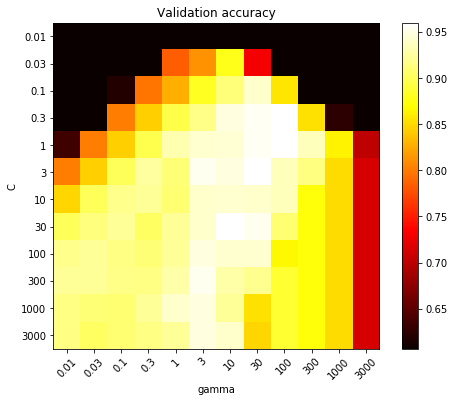

In [399]:
plt.figure(figsize=(8, 6))
#plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(performance, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_range)), param_range, rotation=45)
plt.yticks(np.arange(len(param_range)), param_range)
plt.title('Validation accuracy')
plt.show()

Best performance when: 
1. C= 0.3 and gamma = 100 or
2. C= 3 and gamma = 30 or
3. C= 30 and gamma = 10.

In [447]:
def dataset3Params(X, y, Xval, yval):
    """
        DATASET3PARAMS returns your choice of C and sigma for Part 3 of the exercise
        where you select the optimal (C, sigma) learning parameters to use for SVM
        with RBF kernel
        [C, sigma] = DATASET3PARAMS(X, y, Xval, yval) returns your choice of C and 
        sigma. You should complete this function to return the optimal C and 
        sigma based on a cross-validation set.
    """
    
    param_range = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000]
    performance = list()

    for C, gamma in list(itertools.product(param_range, repeat=2)):
        model = SVC(C=C, kernel='rbf', gamma=gamma)
        model.fit(X, y)

        yval_pred = model.predict(Xval)

        performance.append((C, gamma, f1_score(yval, yval_pred)))

    performance = pd.DataFrame(performance, columns=['C', 'Gamma', 'F1']).set_index(['C', 'Gamma'])#.pivot_table(values='F1', index='C', columns='Gamma')
    C, gamma = performance.idxmax().F1

    return C, gamma

In [450]:
C, gamma = dataset3Params(X, y, Xval, yval)

In [451]:
model = SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y)

SVC(C=0.29999999999999999, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

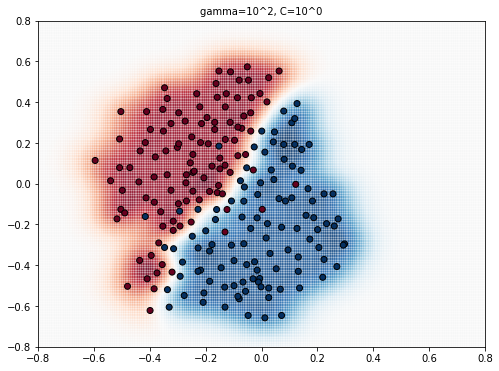

In [469]:
plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-0.8, 0.8, 200), np.linspace(-0.8, 0.8, 200))

# evaluate decision function in a grid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# visualize decision function for these parameters
plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
          size='medium')

# visualize parameter's effect on decision function
plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r,
            edgecolors='k')
plt.axis('tight');



## 2 Spam Classification 

### 2.1 Preprocessing Emails

In [11]:
with open('ex6/emailSample1.txt') as f:
    file_contents = f.read()

In [6]:
print(file_contents)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




In [26]:
def getVocabList(inverse=False):
    """    
        %GETVOCABLIST reads the fixed vocabulary list in vocab.txt and returns a
        %cell array of the words
        %   vocabList = GETVOCABLIST() reads the fixed vocabulary list in vocab.txt 
        %   and returns a cell array of the words in vocabList.
    """

    # Read the fixed vocabulary list
    with open('ex6/vocab.txt') as f:
        fid = f.read()

    # Create dict
    if inverse is True:
        vocabList = pd.DataFrame([(tuple(i.split('\t'))) for i in fid.splitlines()]).set_index(1).to_dict()[0]

    else:
        vocabList = pd.DataFrame([(tuple(i.split('\t'))) for i in fid.splitlines()]).set_index(0).to_dict()[1]
        
    return vocabList

In [147]:
def processEmail(email_contents):
    """
        PROCESSEMAIL preprocesses a the body of an email and
        returns a list of word_indices 
           word_indices = PROCESSEMAIL(email_contents) preprocesses 
           the body of an email and returns a list of indices of the 
           words contained in the email. 
        
    """
    # Load Vocabulary
    vocabList = getVocabList(True);

    # Init return value
    word_indices = list();

    # ========================== Preprocess Email ===========================

    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers

    # hdrstart = strfind(email_contents, ([char(10) char(10)]));
    # email_contents = email_contents(hdrstart(1):end);

    # Lower case
    email_contents = email_contents.lower();

    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents = re.sub('<[^<>]+>', ' ', email_contents);

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.sub('[0-9]+', 'number', email_contents);

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.sub('(http|https)://[^\s]*', 'httpaddr', email_contents);

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_contents);

    # Handle $ sign
    email_contents = re.sub('[$]+', 'dollar', email_contents);


    # ========================== Tokenize Email ===========================

    # Output the email to screen as well
    print('\n==== Processed Email ====\n\n');

    # Process file
    l = 0;

    # Remove any non alphanumeric characters
    email_contents = re.sub('[^a-zA-Z0-9 ]', '', email_contents).split()

    for wrd in email_contents:
        
        # Stem the word
        # (the porterStemmer sometimes has issues, so we use a try catch block)
        try:
            wrd = porterStemmer(wrd.strip())
        except:
            wrd = ''
            continue

        # Skip the word if it is too short
        if len(wrd) < 1:
            continue

        wrd_index = vocabList.get(wrd)
        
        if wrd_index is not None:
            word_indices.append(wrd_index)

        # =============================================================

        # Print to screen, ensuring that the output lines are not too long
        if (l + len(wrd) + 1) > 78:
            print(wrd, end=' ')
            l = 0
        else:
            print(wrd, end=' '),
            l = l + len(wrd) + 1

    # Print footer
    print('\n=========================')
    
    return word_indices

In [41]:
word_indices = processEmail(file_contents)


==== Processed Email ====


anyon
know
how
much
it
cost
to
host
a
web
portal
well
it
depend
on
how
mani
visitor
your
expectingthi
can
be
anywher
from
less
than
number
buck
a
month
to
a
coupl
of
dollarnumb
you
should
checkout
httpaddr
or
perhap
amazon
ecnumb
if
your
run
someth
bigto
unsubscrib
yourself
from
thi
mail
list
send
an
email
toemailaddr



### 2.2 Extracting Features from Emails

In [73]:
def emailFeatures(word_indices):
    """
        EMAILFEATURES takes in a word_indices vector and produces a feature vector
        %from the word indices
        %   x = EMAILFEATURES(word_indices) takes in a word_indices vector and 
        %   produces a feature vector from the word indices.
    """

    # Total number of words in the dictionary
    vocabList = getVocabList(True)

    x = np.array([np.double(np.isin(i, word_indices)) for i in vocabList.values()])

    return x

In [46]:
vocabList = getVocabList(True)

In [75]:
sum(emailFeatures(word_indices))

41.0

Close enough!

### 2.3 Training SVM for Spam Classification

In [86]:
data = loadmat('ex6/spamTrain.mat')
X = data.get('X')
y = data.get('y').flatten()


In [94]:
data_test = loadmat('ex6/spamTest.mat')
X_test = data_test.get('Xtest')
y_test = data_test.get('ytest').flatten()

In [87]:
C = 0.1
gamma = 10

In [88]:
model = SVC(C=C, kernel='linear')#, gamma=gamma)
model.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
# Can use sklearn.metrics.accuracy_score or SVC.score to get accuracy

print('Training set accuracy for trained model = {}'.format(model.score(X, y)))
print('Test set accuracy for trained model = {}'.format(model.score(X_test, y_test)))


Training set accuracy for trained model = 0.99825
Test set accuracy for trained model = 0.989


In [100]:
from sklearn.metrics import accuracy_score, f1_score

In [101]:
# Can use sklearn.metrics.accuracy_score or SVC.score to get accuracy

print('Training set accuracy for trained model = {}'.format(f1_score(y, model.predict(X))))
print('Test set accuracy for trained model = {}'.format(f1_score(y_test, model.predict(X_test))))


Training set accuracy for trained model = 0.9972559780478243
Test set accuracy for trained model = 0.9822866344605474


### 2.4 Top Predictors for Spam

In [129]:
for i in model.coef_.argsort()[0][-15:]: # get the first 15 terms. Arg sort gets the index values sorted by 
    print(getVocabList().get(str(i)))

hot
futur
ll
natur
mortgag
player
previous
wife
doesn
base
visa
gt
remot
clearli
otherwis


In [130]:
model.coef_.argsort()[0][-15:]

array([ 791,  698,  965, 1088, 1066, 1263, 1298, 1851,  476,  155, 1795,
        738, 1397,  297, 1190])

Not the same as the pdf... but I get the point

### 2.5 Optional (ungraded) exercise: Try your own emails

In [148]:
#filename = 'ex6/spamSample2.txt'
filename = 'ex6/emailSample2.txt'

In [149]:
# Read and predict
with open(filename) as f:
    file_contents = f.read()

word_indices  = processEmail(file_contents);
x             = emailFeatures(word_indices);
p = model.predict(x.reshape([1, -1]));

print('\nProcessed {}\n\nSpam Classification: {}'.format(filename, p));
print('(1 indicates spam, 0 indicates not spam)\n');


==== Processed Email ====


folk my first time post have a bit of unix experi but am new to linux just got a new pc at home dell box with window xp ad a second hard diskfor linux partit the disk and have instal suse numbernumb from cd which wentfin except it didnt pick up my monitor i have a dell brand enumberfpp number lcd flat panel monitor and a nvidia geforcenumbertinumb video card both of which ar probabl too new to featur in suse defaultset i download a driver from the nvidia websit and instal it us rpmthen i ran saxnumb as wa recommend in some post i found on the net butit still doesnt featur my video card in the avail list what next anoth problem i have a dell brand keyboard and if i hit capslock twiceth whole machin crash in linux not window even the onoff switch isinact leav me to reach for the power cabl instead if anyon can help me in ani wai with these prob id be realli grate iv search the net but have run out of idea or should i be go for a differ version of linux such a

### 2.6 Optional (ungraded) exercise: Build your own dataset

Another time